What is Fake News?

A type of yellow journalism, fake news encapsulates pieces of news that may be hoaxes and is generally spread through social media and other online media. This is often done to further or impose certain ideas and is often achieved with political agendas. Such news items may contain false and/or exaggerated claims, and may end up being viralized by algorithms, and users may end up in a filter bubble.

What is a TfidfVectorizer?


TF (Term Frequency): The number of times a word appears in a document is its Term Frequency. A higher value means a term appears more often than others, and so, the document is a good match when the term is part of the search terms.

IDF (Inverse Document Frequency): Words that occur many times a document, but also occur many times in many others, may be irrelevant. IDF is a measure of how significant a term is in the entire corpus.
The TfidfVectorizer converts a collection of raw documents into a matrix of TF-IDF features.

What is a PassiveAggressiveClassifier?

Passive Aggressive algorithms are online learning algorithms. Such an algorithm remains passive for a correct classification outcome, and turns aggressive in the event of a miscalculation, updating and adjusting. Unlike most other algorithms, it does not converge. Its purpose is to make updates that correct the loss, causing very little change in the norm of the weight vector.

In [192]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import itertools
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score,confusion_matrix

In [193]:
#read data
data = pd.read_csv(r"C:\Users\amany\Desktop\DSProject\news.csv")
data.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [194]:
data.shape

(6335, 4)

In [195]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
Unnamed: 0    6335 non-null int64
title         6335 non-null object
text          6335 non-null object
label         6335 non-null object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [196]:
data.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

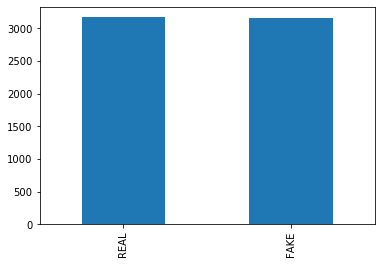

In [197]:
data['label'].value_counts().plot.bar()

In [198]:
data['label'].value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

In [199]:
labels=data.label
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [200]:
x_train,x_test,y_train,y_test = train_test_split(data['text'],labels,test_size=0.2,random_state=0)

 Let’s initialize a TfidfVectorizer with stop words from the English language and a maximum document frequency of 0.7 (terms with a higher document frequency will be discarded). Stop words are the most common words in a language that are to be filtered out before processing the natural language data. And a TfidfVectorizer turns a collection of raw documents into a matrix of TF-IDF features.

Now, fit and transform the vectorizer on the train set, and transform the vectorizer on the test set.

In [201]:
tfidf_vectorizer=TfidfVectorizer(stop_words='english',max_df=0.7)

tfidf_train=tfidf_vectorizer.fit_transform(x_train)
tfidf_test=tfidf_vectorizer.transform(x_test)

In [202]:
pac=PassiveAggressiveClassifier(max_iter=40)
pac.fit(tfidf_train,y_train)

PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
                            early_stopping=False, fit_intercept=True,
                            loss='hinge', max_iter=40, n_iter_no_change=5,
                            n_jobs=None, random_state=None, shuffle=True,
                            tol=0.001, validation_fraction=0.1, verbose=0,
                            warm_start=False)

In [203]:
y_pred=pac.predict(tfidf_test)

In [204]:
accuracy=accuracy_score(y_pred,y_test)
print(f"accuracy: {round(accuracy*100,2)}%")

accuracy: 93.37%


In [205]:
confusion_matrix(y_test,y_pred,labels=['FAKE','REAL'])

array([[571,  44],
       [ 40, 612]], dtype=int64)

So with this model, we have 573 true positives, 615 true negatives, 37 false positives, and 42 false negative

In [206]:
pac.get_params()

{'C': 1.0,
 'average': False,
 'class_weight': None,
 'early_stopping': False,
 'fit_intercept': True,
 'loss': 'hinge',
 'max_iter': 40,
 'n_iter_no_change': 5,
 'n_jobs': None,
 'random_state': None,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}